In [1]:
%matplotlib notebook

In [2]:
import sys
import matplotlib.pyplot as plt
import numpy as np
import math
import numpy.ma as ma
from scipy.interpolate import griddata

from mpl_toolkits.axes_grid1 import Divider, Size 
from mpl_toolkits.axes_grid1.mpl_axes import Axes

In [3]:
def Q2th (deg,lam): # function to convert 2theta into scattering vector, Q
	
	return 4.0*np.pi*np.sin(deg/360.0*np.pi)/lam

In [4]:
import matplotlib
print('matplotlib: {}'.format(matplotlib.__version__))

matplotlib: 3.7.0


In [5]:
def noaxis(ax):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.tick_params(bottom=False, top=False, left=False, right=False)
    ax.tick_params(labelbottom=False, labeltop=False, labelleft=False, labelright=False)
    ax.patch.set_facecolor('none')

<IPython.core.display.Javascript object>


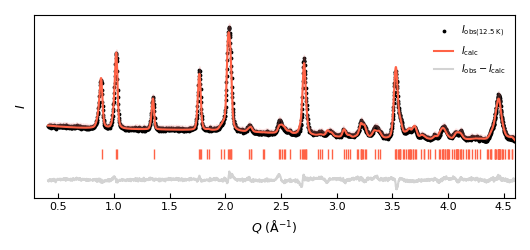

In [10]:
data = np.loadtxt('./nuc_only/FeCl2pym_PND_xeroji_12p5K_riet_P21m.dat') #PXRD data file which has been converted to .dat or .xy
rugn = np.genfromtxt('./nuc_only/FeCl2pym_PND_xeroji_12p5K_riet_P21m_rug_marks.dat')

fig = plt.figure(100, figsize=(5.3, 2.5))
ax1 = plt.subplot()
ax1.tick_params(axis='both', labelsize=8, direction="in")

Q = 4*np.pi*np.sin(data[:,0]/2/180*np.pi)/2.41

obs = ax1.scatter (Q,data[:,1]-70, s=3, label='$I_{obs}$', color='black')
calc, = ax1.plot (Q,data[:,2]-70, linewidth=1.5, label='$I_{calc}$', color='tomato')
diff, = ax1.plot (Q,data[:,3]+200, linewidth=1.5, label='$I_{obs}$-$I_{calc}$', color='lightgrey')
plt.fill_between(Q, (data[:,1] - data[:,4]), (data[:,1] + data[:,4]), color='lightcoral', alpha=0.2)
ax1.plot(rugn[:,4], ([900]*len(rugn)), '|', ms=7, c='tomato')

ax1.set_xlabel('$Q$ (Å$^{-1}$)', fontsize=9)
ax1.set_ylabel('$I$', fontsize=9)
ax1.set_xlim((0.28,4.6))
#ax1.set_ylim((-25,450))
plt.yticks([])
plt.xticks(fontsize=8)
ax1.tick_params(axis='both', labelsize=8)
ax1.legend([obs, calc, diff],['$I_{\mathrm{obs}(12.5\;\mathrm{K})}$','$I_{\mathrm{calc}}$','$I_{\mathrm{obs}}-I_{\mathrm{calc}}$'], frameon=False, loc='upper right', fontsize=7)
plt.tight_layout()
# plt.savefig('FeCl2pym_PND_xeroji_12p5K_riet.pdf', bbox_inches='tight', transparent=True) #The output of your plot as an image or a pdf
plt.show()

<IPython.core.display.Javascript object>


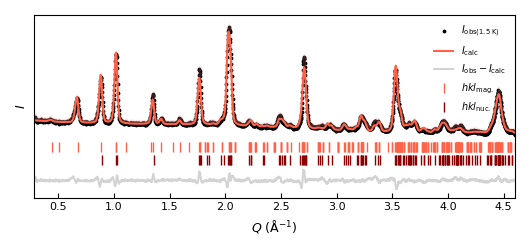

In [12]:
data = np.loadtxt('./nuc_mag/FeCl2pym_1p5K_mag_nuc_combined_riet_P21m_fit.dat') #PXRD data file which has been converted to .dat or .xy
rug = np.genfromtxt('./nuc_mag/FeCl2pym_1p5K_mag_nuc_combined_riet_P21m_fit_rug_marks.dat')
rugm = np.genfromtxt('./nuc_mag/FeCl2pym_xeroji_1p5K-12p5K_PND_ORNL_riet_P21m_fit_rug_marks_all.dat')

fig = plt.figure(101, figsize=(5.3, 2.5))
ax1 = plt.subplot()
ax1.tick_params(axis='both', labelsize=8, direction="in")

Q = 4*np.pi*np.sin(data[:,0]/2/180*np.pi)/2.41

obs = ax1.scatter (Q,data[:,1]-70, s=3, label='$I_{obs}$', color='black')
calc, = ax1.plot (Q,data[:,2]-70, linewidth=1.5, label='$I_{calc}$', color='tomato')
diff, = ax1.plot (Q,data[:,3]-100, linewidth=1.5, label='$I_{obs}$-$I_{calc}$', color='lightgrey')
plt.fill_between(Q, (data[:,1] - data[:,4]), (data[:,1] + data[:,4]), color='lightcoral', alpha=0.2)
#ax1.plot(rug[:,4], ([900]*len(rug)), '|', ms=7, c='tomato')
mag, = ax1.plot(rugm[:,4], ([900]*len(rugm)), '|',ms=7, c='tomato')
nuc, = ax1.plot(rugn[:,4], ([500]*len(rugn)), '|',ms=7, c='darkred')

ax1.set_xlabel('$Q$ (Å$^{-1}$)', fontsize=9)
ax1.set_ylabel('$I$', fontsize=9)
ax1.set_xlim((0.28,4.6))
#ax1.set_ylim((-25,450))
plt.yticks([])
plt.xticks(fontsize=8)
ax1.tick_params(axis='both', labelsize=8)
ax1.legend([obs, calc, diff, mag, nuc],['$I_{\mathrm{obs}(1.5\;\mathrm{K})}$','$I_{\mathrm{calc}}$','$I_{\mathrm{obs}}-I_{\mathrm{calc}}$','$hkl_\mathrm{mag.}$','$hkl_\mathrm{nuc.}$'], frameon=False, loc='upper right', fontsize=7)
plt.tight_layout()
#plt.savefig('Fe_1p5K_mag_nuc_combined_riet_P21m_fit.pdf', bbox_inches='tight', transparent=True) #The output of your plot as an image or a pdf
plt.show()